In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import pyplot
import math

# Importing the data

In [52]:
series = pd.read_csv('./Assets/eurcad_price.csv', header= None,  index_col=0, parse_dates=True, squeeze=True)


# resampling the series to monthly
series = series.resample('1M').mean()

# Visualising the data

In [40]:
series.head

<bound method NDFrame.head of 0
1989-01-31    1.315039
1989-02-28    1.305481
1989-03-31    1.300852
1989-04-30    1.326207
1989-05-31    1.332445
                ...   
2021-08-31    1.520337
2021-09-30    1.510923
2021-10-31    1.522088
2021-11-30    1.532036
2021-12-31    1.527181
Freq: M, Name: 1, Length: 396, dtype: float64>

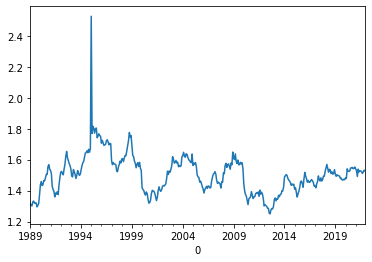

In [41]:
series.plot.line()
pyplot.show()

In [42]:

def plot_series(series):
    plt.figure(figsize=(12,6))
    plt.plot(series, color='red')
    plt.ylabel('Security', fontsize=16)
    plt.xlabel('Year', fontsize=16)

    for year in range(1988, 2021):
        plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)

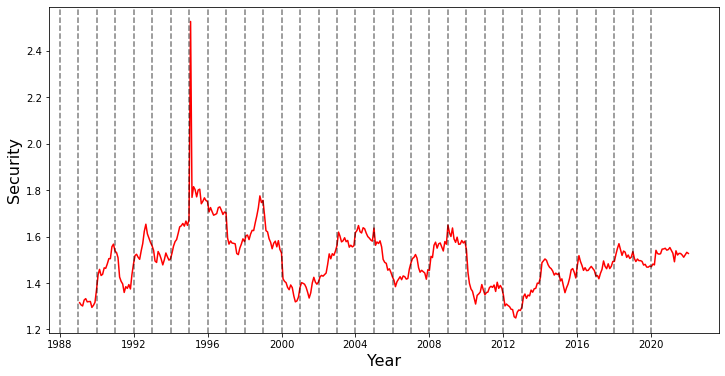

In [43]:
plot_series(series)

# Normalizing the dataset

In [44]:
avg, dev = series.mean(), series.std()

In [45]:

series = (series - avg) / dev

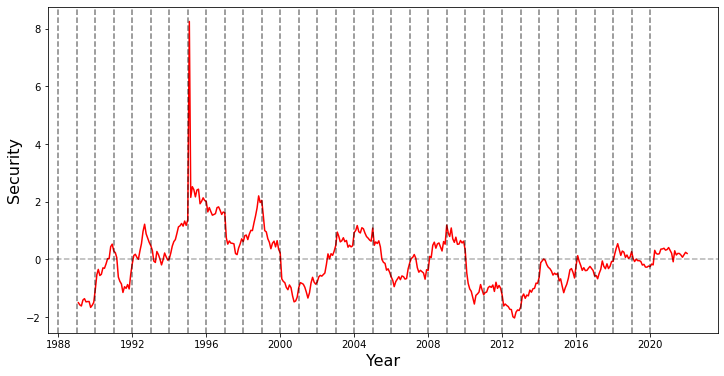

In [46]:
plot_series(series)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)

# Remove Increasing Volatility

In [47]:
annual_volatility = series.groupby(series.index.year).std()
annual_volatility

0
1989    0.160847
1990    0.378864
1991    0.451747
1992    0.388668
1993    0.155953
1994    0.371688
1995    1.756713
1996    0.099667
1997    0.179836
1998    0.543814
1999    0.354547
2000    0.265097
2001    0.201998
2002    0.396697
2003    0.180691
2004    0.177658
2005    0.458596
2006    0.210894
2007    0.268942
2008    0.286779
2009    0.198867
2010    0.275610
2011    0.127263
2012    0.150010
2013    0.220768
2014    0.205628
2015    0.289670
2016    0.178916
2017    0.198830
2018    0.148720
2019    0.110968
2020    0.202850
2021    0.103930
Name: 1, dtype: float64

In [48]:
annual_vol = series.index.map(lambda d: annual_volatility.loc[d.year])

In [49]:
annual_vol

Float64Index([ 0.1608466835421673,  0.1608466835421673,  0.1608466835421673,
               0.1608466835421673,  0.1608466835421673,  0.1608466835421673,
               0.1608466835421673,  0.1608466835421673,  0.1608466835421673,
               0.1608466835421673,
              ...
              0.10393035197935449, 0.10393035197935449, 0.10393035197935449,
              0.10393035197935449, 0.10393035197935449, 0.10393035197935449,
              0.10393035197935449, 0.10393035197935449, 0.10393035197935449,
              0.10393035197935449],
             dtype='float64', name=0, length=396)

In [50]:
series = series/ annual_vol

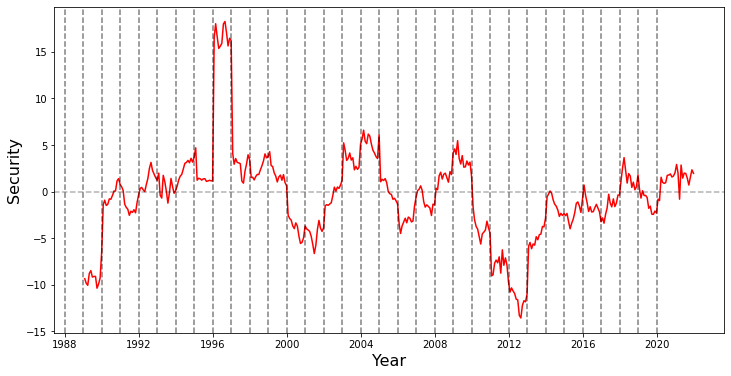

In [51]:
plot_series(series)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)